In [2]:
# Importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Downloading historical stock data for NVIDIA from Yahoo Finance.
start = '2013-01-01'
end = '2023-12-21'
stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,0.314000,0.318250,0.312750,0.318000,0.293560,478836000
1,2013-01-03,0.318000,0.321750,0.314500,0.318250,0.293791,298888000
2,2013-01-04,0.318750,0.329750,0.317750,0.328750,0.303484,524968000
3,2013-01-07,0.328500,0.329500,0.317000,0.319250,0.294714,610732000
4,2013-01-08,0.320000,0.321000,0.310000,0.312250,0.288252,466424000
...,...,...,...,...,...,...,...
2757,2023-12-14,48.389999,48.669998,47.422001,48.349998,48.343758,391232000
2758,2023-12-15,48.194000,49.403999,48.119999,48.889999,48.883690,479948000
2759,2023-12-18,49.400002,50.432999,49.150002,50.077000,50.070538,412587000
2760,2023-12-19,49.424000,49.700001,48.895000,49.604000,49.597599,464444000


In [6]:
# Calculating the 100-day moving average for the stock's closing price.
ma_100_days = data.Close.rolling(100).mean()

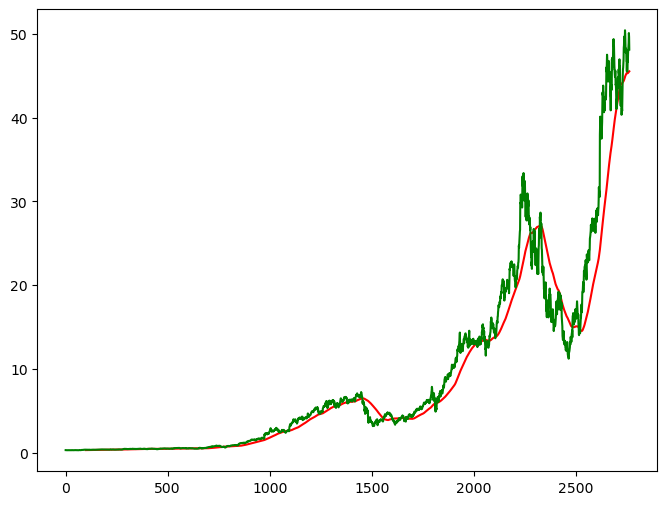

In [7]:
# Plotting the 100-day moving average in red and the actual closing price in green.
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
# Calculating the 200-day moving average for the stock's closing price.
ma_200_days = data.Close.rolling(200).mean()

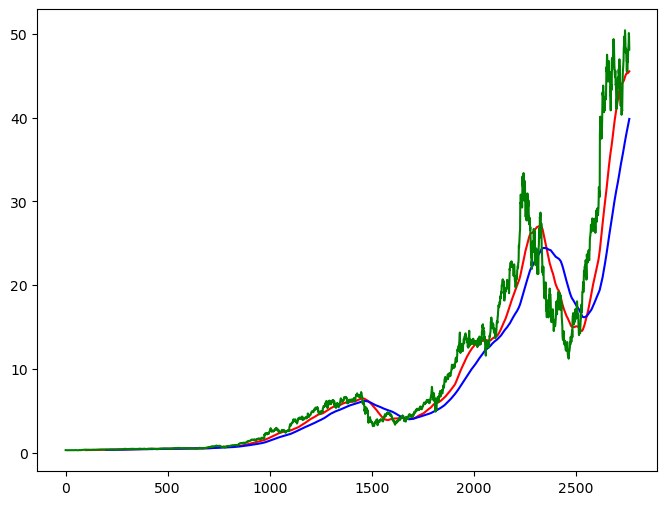

In [9]:
# Plotting both the 100-day and 200-day moving averages with the actual closing price.
# The 200-day moving average is plotted in blue.
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
# Dropping any rows with missing values in the dataset to ensure clean data.
data.dropna(inplace=True)

In [11]:
# Splitting the data into training and testing sets:
# - The first 80% of the data is used for training the model.
# - The remaining 20% is used for testing the model's performance.
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0] 

2209

In [13]:
data_test.shape[0]

553

In [14]:
# Importing the MinMaxScaler from scikit-learn to scale the data.
# Scaling the training data to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
# Creating sequences of 100 data points (or time steps) as input features (X)
# and the corresponding target (Y) for each sequence.
# The model will use the past 100 days of data to predict the next day's stock price.
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [17]:
# Converting the lists of input features and targets into numpy arrays
# for compatibility with the Keras model.
x, y = np.array(x), np.array(y)

In [18]:
# Importing necessary layers (LSTM, Dense, Dropout) and model type (Sequential) from Keras.
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
# Building the LSTM model:
# - The model consists of four LSTM layers with increasing units (50, 60, 80, 120).
# - Dropout layers are added to prevent overfitting by randomly setting a fraction of input units to 0.
# - The final Dense layer outputs a single value, which is the predicted stock price.
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\shris\Conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compiling the model with the Adam optimizer and Mean Squared Error (MSE) as the loss function.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# Training the model on the training data:
# - The model will train for 50 epochs with a batch size of 32.
# - Verbose=1 will print out the progress of training.
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0390
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0045
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0036
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0039
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0029
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0034
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0032
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0038
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0031
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0028
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0030
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0031
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0027
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0026
Epo

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
# Preparing the test data by appending the last 100 days of the training data 
# to the beginning of the test data.
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)   

In [26]:
# Creating input sequences (X) and targets (Y) for the test set 
# following the same method as with the training set.
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])


In [27]:
x, y = np.array(x), np.array(y)

In [28]:
# Using the trained model to make predictions on the test data.
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

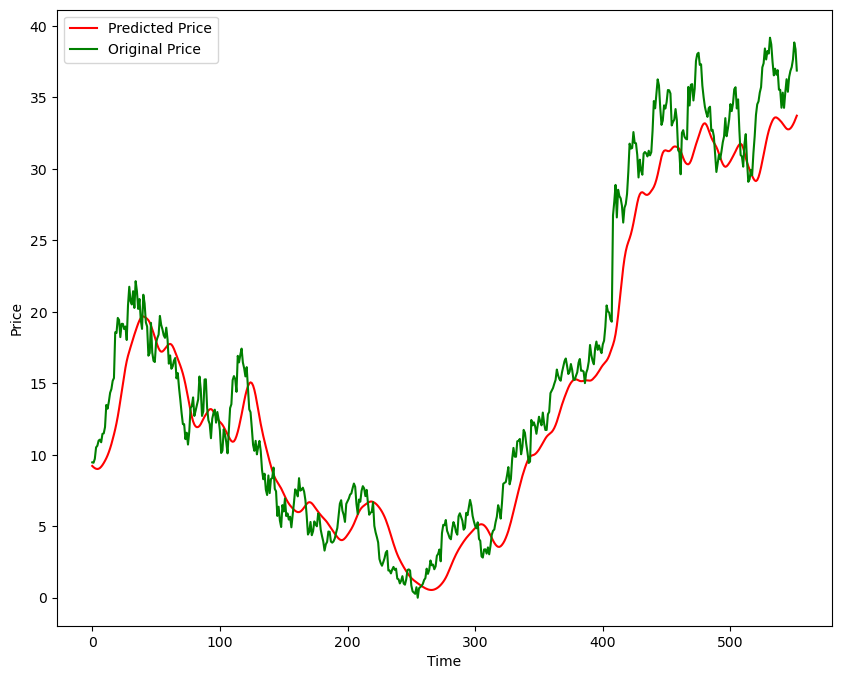

In [32]:
# Plotting the predicted stock prices against the actual prices to visually compare
# the model's performance. The predicted prices are plotted in red, 
# while the actual prices are plotted in green.
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [33]:
# Saving the trained model to a file named 'Stock Predictions Model.keras'.
# This allows for the model to be reloaded later for further predictions or analysis.
model.save('Stock Predictions Model.keras')